In [1]:
%matplotlib inline
from IPython.display import display, HTML
from analysis import Analysis
from models import *
analysis = Analysis('weather', normalize=True, logger=display)
analysis.load_data()

//anaconda/envs/python35/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Now setting the predictor to be the avg temperature value.

The features will be the actual_min_temp, actual_max_temp, and the actual_precipitation and the predictor value.

In [2]:
predictor = 'actual_mean_temp'
features = ['actual_min_temp', 'actual_max_temp', 'actual_precipitation', predictor]
analysis.set_feature_predictor_columns(features, predictor)
analysis.train_test_split()

'Number of train data points: 292'

'Number of test data points: 73'

Set some parameters that are used by some of the models

In [3]:
# The number of days to chunk inputs by
NUM_DAYS = 5

# 
NUM_FEATURES = len(analysis.features)

Going to try each different model.

ARIMA

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1822.467, BIC=1855.558, Fit time=2.992 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1963.365, BIC=1992.779, Fit time=2.374 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1830.452, BIC=1859.866, Fit time=3.052 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1823.327, BIC=1860.094, Fit time=2.442 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1985.774, BIC=2015.188, Fit time=0.802 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=nan, BIC=nan, Fit time=0.440 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1826.074, BIC=1866.518, Fit time=7.587 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1816.712, BIC=1853.480, Fit time=2.513 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 1

'Train Error: 5.00765086468  Num NaN: 0'

'Test Error: 5.66677762956    Num NaN: 0'

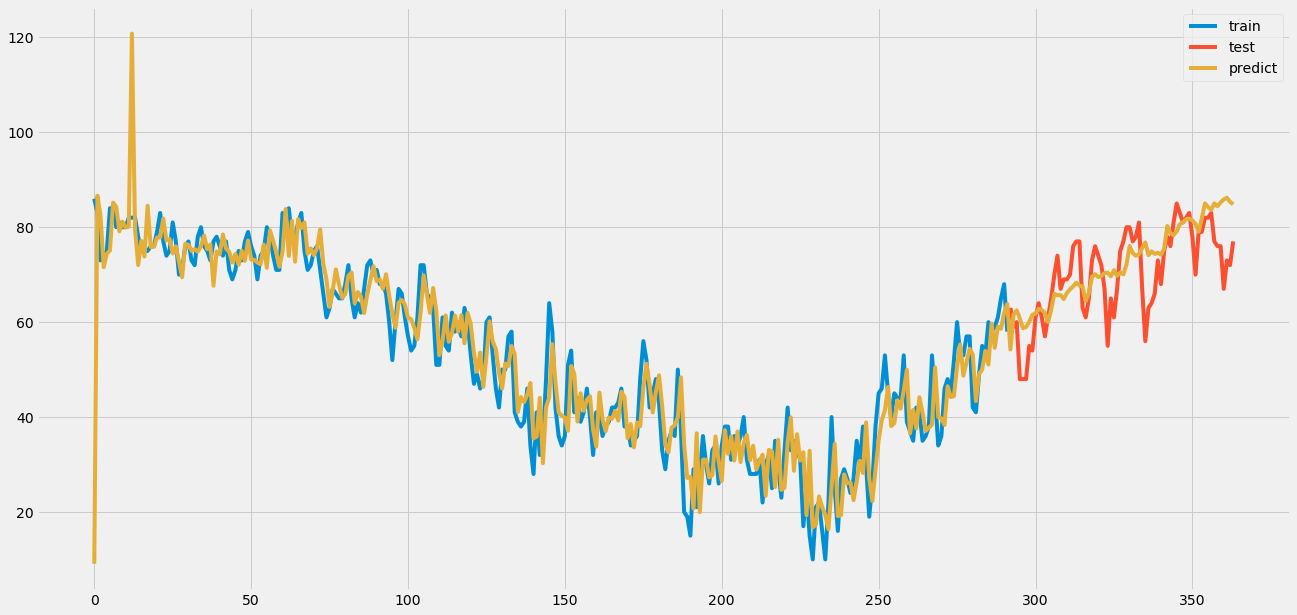

In [4]:
model = ARIMA(analysis)
analysis.run_model(model)

'Train Error: 4.18287671233  Num NaN: 0'

'Test Error: 4.94166666667    Num NaN: 0'

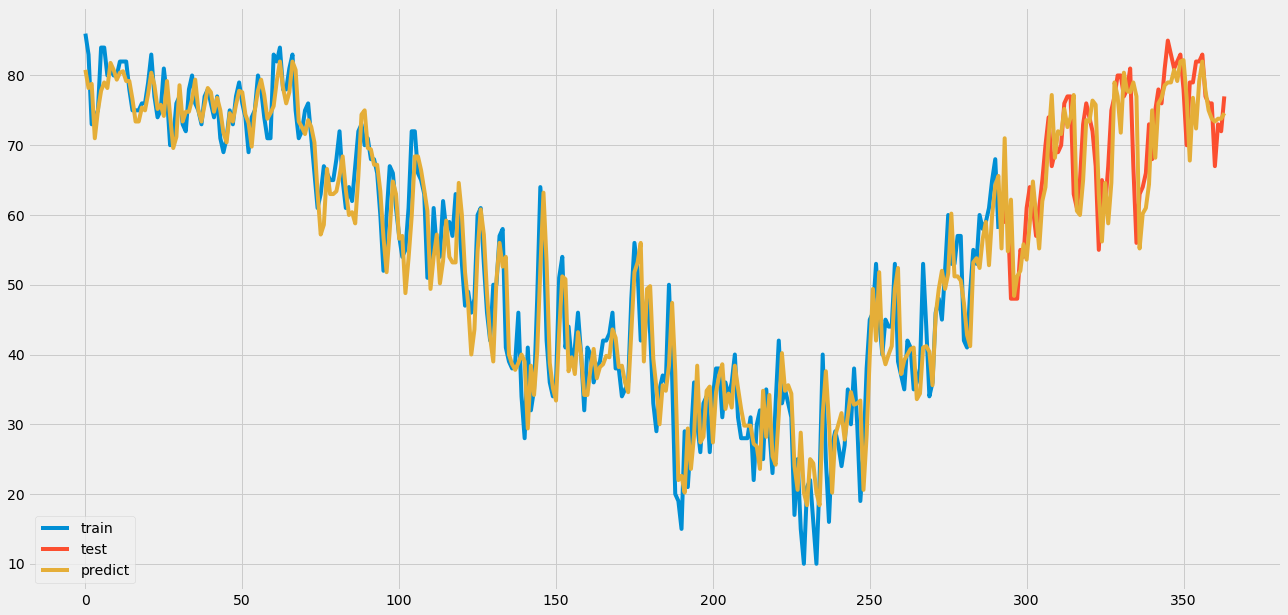

In [5]:
from sklearn.neighbors import KNeighborsRegressor
model = Regressor(analysis, KNeighborsRegressor)
analysis.run_model(model)

//anaconda/envs/python35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


'Train Error: 6.21599215639  Num NaN: 0'

'Test Error: 6.16408457395    Num NaN: 0'

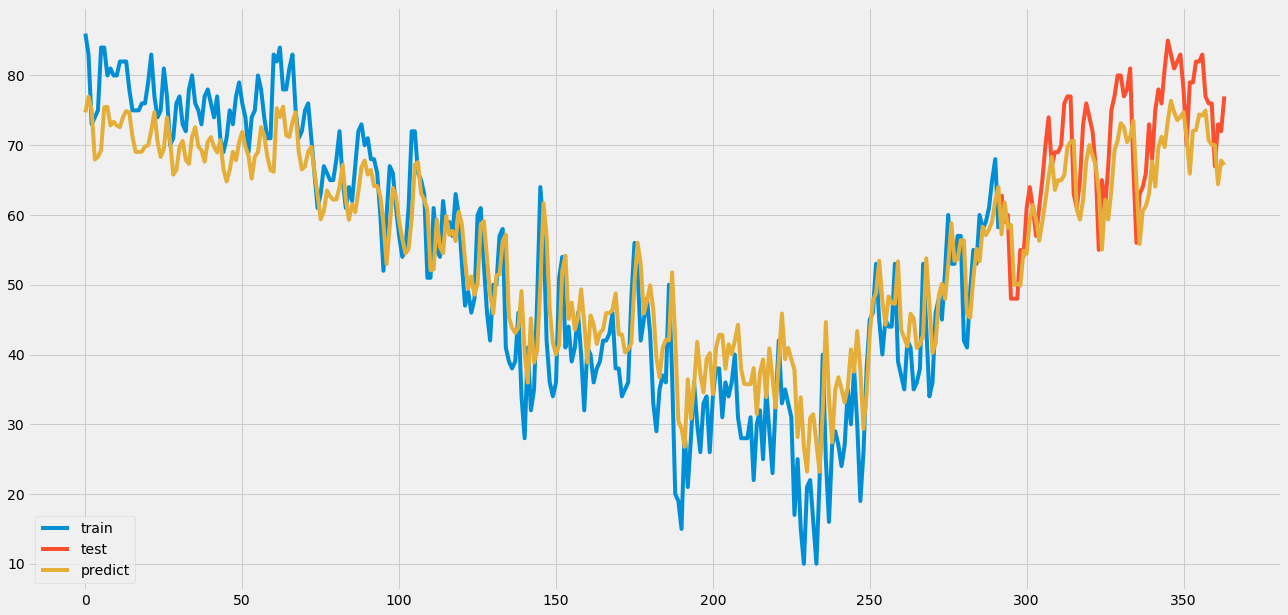

In [6]:
from sklearn.linear_model import SGDRegressor
model = Regressor(analysis, SGDRegressor)
analysis.run_model(model)

'Train Error: 2.22140410959  Num NaN: 0'

'Test Error: 4.68231481481    Num NaN: 0'

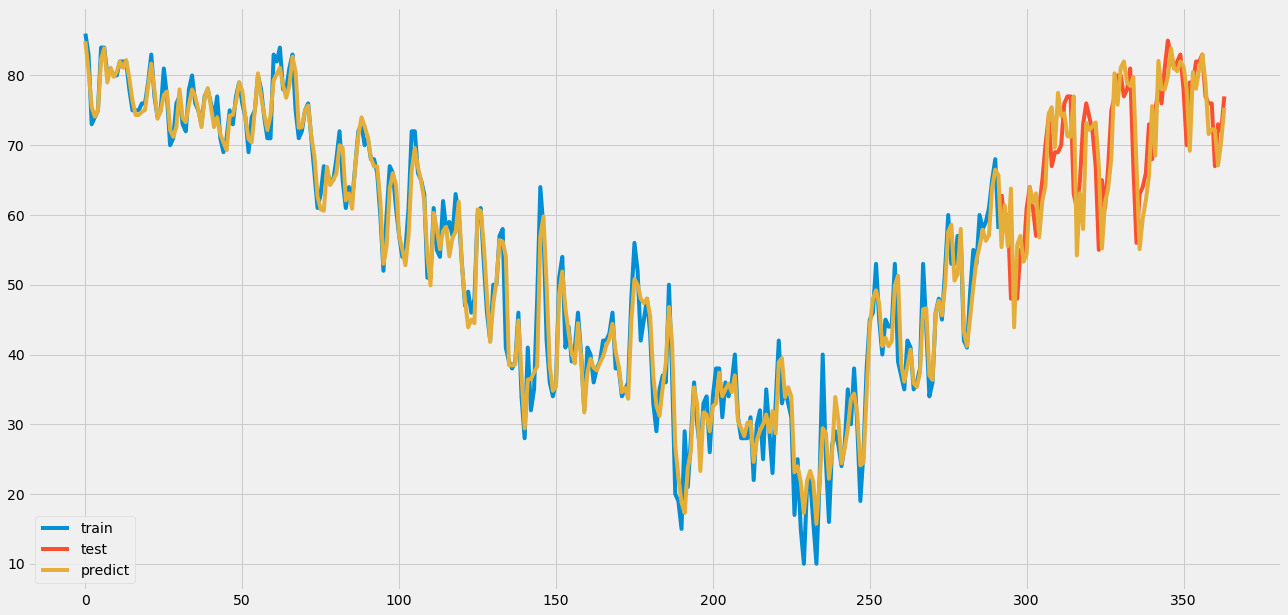

In [7]:
from sklearn.ensemble import RandomForestRegressor
model = Regressor(analysis, RandomForestRegressor)
analysis.run_model(model)

'Train Error: 4.38738202373  Num NaN: 0'

'Test Error: 4.83617955397    Num NaN: 0'

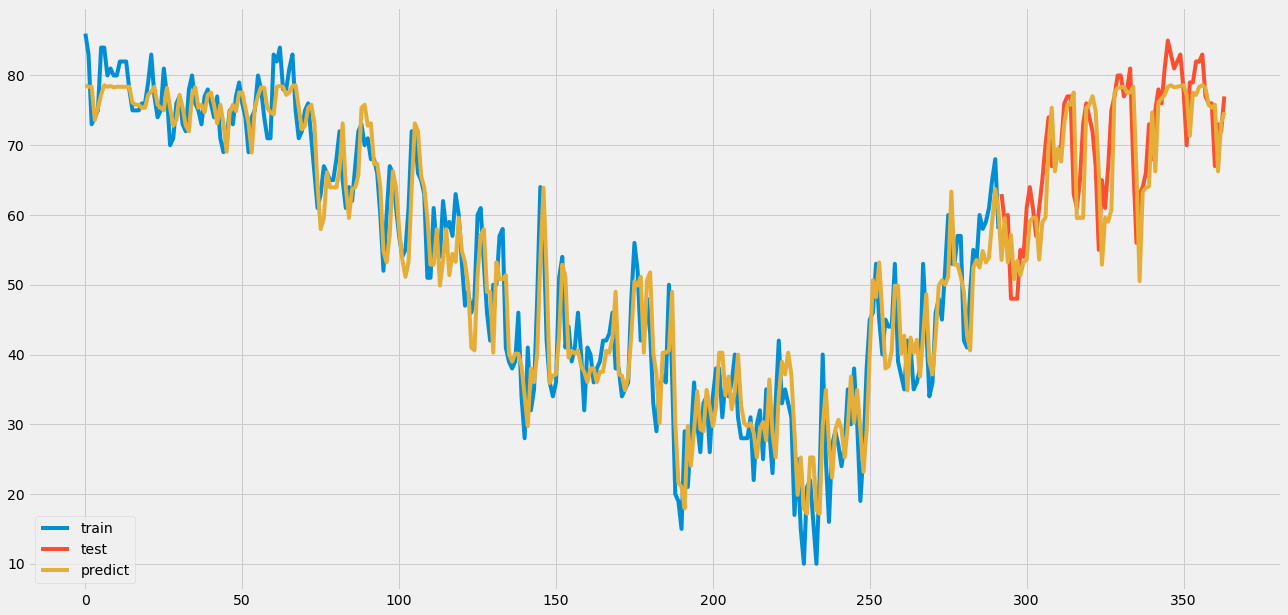

In [8]:
from sklearn.ensemble import AdaBoostRegressor
model = Regressor(analysis, AdaBoostRegressor)
analysis.run_model(model)

'Train Error: 3.39899198976  Num NaN: 0'

'Test Error: 21.7827522622    Num NaN: 0'

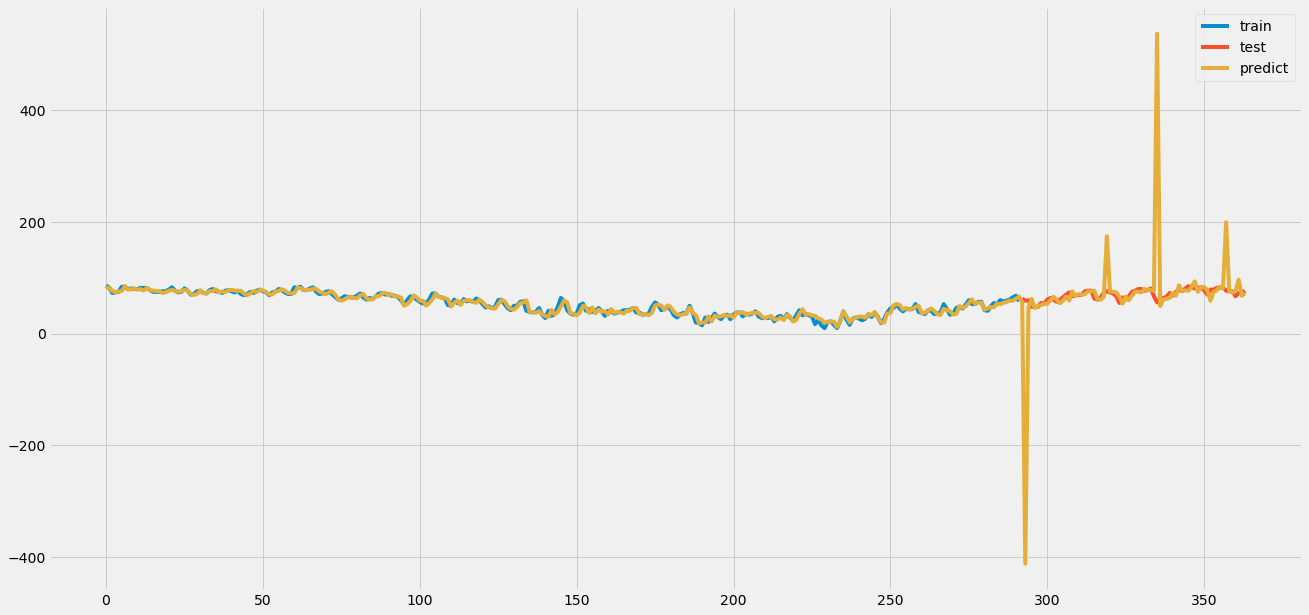

In [9]:
from sklearn.gaussian_process import GaussianProcessRegressor
model = Regressor(analysis, GaussianProcessRegressor)
analysis.run_model(model)

Now going to use models that require chunking.  We perform chunking by taking the time series:

x = (x0, x1, x2, x3, ...)
y = (x1, x2, x3, x4, ...)

and modifying it such that if the chunk parameter, c, is set to 3:

x = ((x0, x1, x2), (x1, x2, x3), (x2, x3, x4), ...)
y = (x3, x4, x5, ...)

This results in the first c values in not having a prediction and thus (Num NaN is > 0 and == c).



LinearRegression

'Train Error: 5.57814052236  Num NaN: 5'

'Test Error: 6.24115874309    Num NaN: 5'

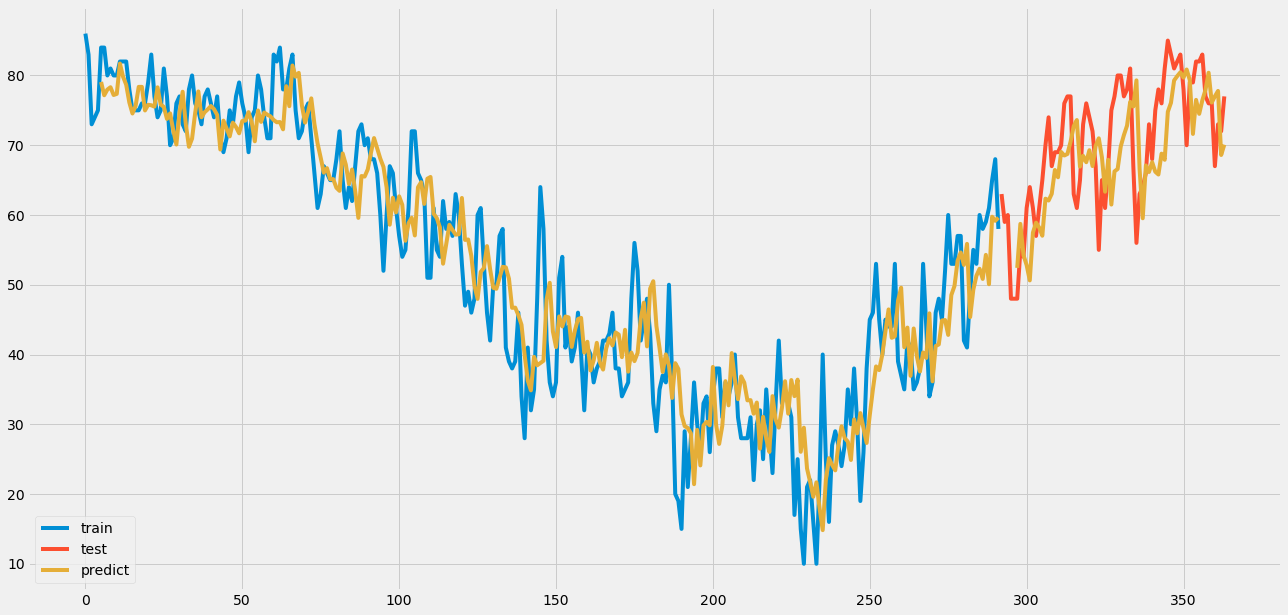

In [10]:
model = LinearRegression(analysis, num_days=NUM_DAYS)
analysis.run_model(model)

FeedForward Neural Network

Using TensorFlow backend.


Train on 287 samples, validate on 67 samples
Epoch 1/10
 - 0s - loss: 0.2218 - val_loss: 0.1762
Epoch 2/10
 - 0s - loss: 0.1394 - val_loss: 0.1343
Epoch 3/10
 - 0s - loss: 0.1280 - val_loss: 0.1243
Epoch 4/10
 - 0s - loss: 0.1220 - val_loss: 0.1362
Epoch 5/10
 - 0s - loss: 0.1173 - val_loss: 0.0961
Epoch 6/10
 - 0s - loss: 0.1139 - val_loss: 0.0989
Epoch 7/10
 - 0s - loss: 0.1123 - val_loss: 0.1104
Epoch 8/10
 - 0s - loss: 0.1098 - val_loss: 0.1039
Epoch 9/10
 - 0s - loss: 0.1068 - val_loss: 0.1016
Epoch 10/10
 - 0s - loss: 0.1059 - val_loss: 0.1025


'Train Error: 7.77180902135  Num NaN: 5'

'Test Error: 7.68888382413    Num NaN: 5'

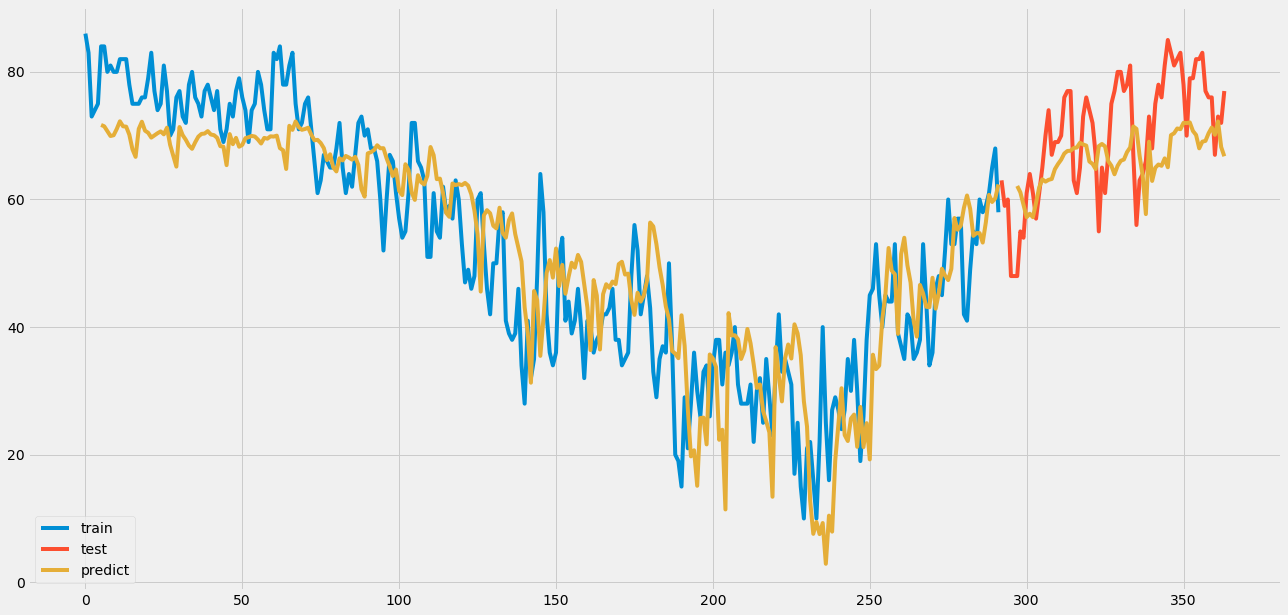

In [11]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

nn = Sequential()
nn.add(layers.Dense(25, activation='tanh',
                    batch_input_shape=(None, NUM_DAYS * NUM_FEATURES)))
nn.add(layers.Dense(10, activation='tanh'))
nn.add(layers.Dense(1, activation='tanh'))
nn.compile(loss='mae', optimizer='sgd')

model = FNN(analysis, nn, num_days=NUM_DAYS)
analysis.run_model(model)


Recurrent Neural Network

Train on 287 samples, validate on 67 samples
Epoch 1/10
 - 0s - loss: 0.2609 - val_loss: 0.3111
Epoch 2/10
 - 0s - loss: 0.2396 - val_loss: 0.2082
Epoch 3/10
 - 0s - loss: 0.2451 - val_loss: 0.1153
Epoch 4/10
 - 0s - loss: 0.2314 - val_loss: 0.4105
Epoch 5/10
 - 0s - loss: 0.2455 - val_loss: 0.0985
Epoch 6/10
 - 0s - loss: 0.2532 - val_loss: 0.3579
Epoch 7/10
 - 0s - loss: 0.2407 - val_loss: 0.4507
Epoch 8/10
 - 0s - loss: 0.2339 - val_loss: 0.2281
Epoch 9/10
 - 0s - loss: 0.2404 - val_loss: 0.2865
Epoch 10/10
 - 0s - loss: 0.2315 - val_loss: 0.2083


'Train Error: 16.806675037  Num NaN: 5'

'Test Error: 15.6234657515    Num NaN: 5'

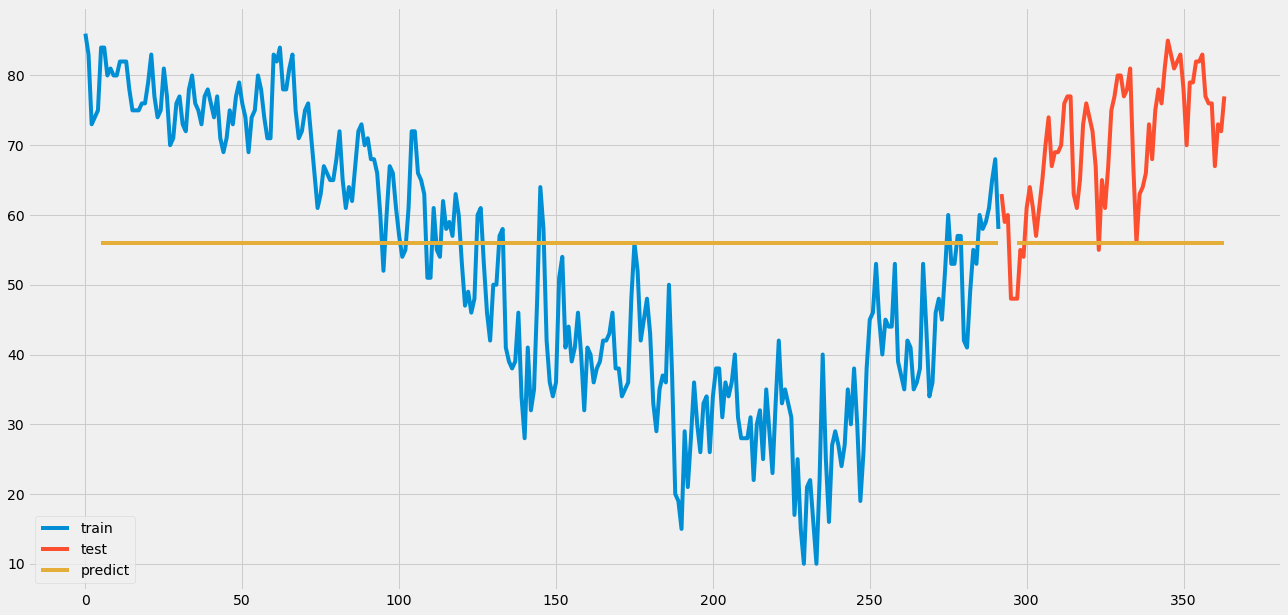

In [12]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(NUM_DAYS, NUM_FEATURES)))
nn.add(layers.SimpleRNN(50, input_shape=(NUM_DAYS, NUM_FEATURES)))

nn.add(layers.Dense(1, activation='tanh'))
nn.add(layers.Dense(1, activation='linear'))
nn.compile(loss='mae', optimizer=optimizers.RMSprop(lr=0.1))
        
model = RNNSingle(analysis, nn, num_days=NUM_DAYS, mask_value=mask_value)
analysis.run_model(model)

LSTM Network

In [13]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(NUM_DAYS, NUM_FEATURES)))
nn.add(layers.LSTM(50, activation='tanh', input_shape=(NUM_DAYS, NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mae', optimizer='rmsprop')

model = RNNMultiple(analysis, nn, num_days=NUM_DAYS, mask_value=mask_value)
analysis.run_model(model)

Train on 59 samples, validate on 15 samples
Epoch 1/10
 - 1s - loss: 0.8851 - val_loss: 0.6775
Epoch 2/10
 - 0s - loss: 0.6671 - val_loss: 0.4669
Epoch 3/10
 - 0s - loss: 0.5042 - val_loss: 0.3248
Epoch 4/10
 - 0s - loss: 0.3835 - val_loss: 0.2376
Epoch 5/10
 - 0s - loss: 0.2992 - val_loss: 0.1830
Epoch 6/10
 - 0s - loss: 0.2392 - val_loss: 0.1465
Epoch 7/10
 - 0s - loss: 0.1965 - val_loss: 0.1200
Epoch 8/10
 - 0s - loss: 0.1636 - val_loss: 0.0991
Epoch 9/10
 - 0s - loss: 0.1378 - val_loss: 0.0818
Epoch 10/10
 - 0s - loss: 0.1165 - val_loss: 0.0676


IndexError: index 295 is out of bounds for axis 1 with size 295

In [ ]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(len(analysis.x_train), NUM_FEATURES)))
nn.add(layers.LSTM(50, activation='tanh', input_shape=(len(analysis.x_train), NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mae', optimizer='rmsprop')

model = RNNAll(analysis, nn, mask_value=mask_value)
analysis.run_model(model)